In [133]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (20, 10)
from sklearn.metrics import confusion_matrix

# Examen parcial 1
Jerónimo Aranda Barois 150344

## 0. Obtener muestra
Leamos los datos y posteriormente obtengamos una muestra del 85% que será salvada en un nuevo archivo llamado `mi_muestra150344.csv`.

Cómo podemos ver el archivo original contiene 382 observaciones y 20 columnas:


In [29]:
df=pd.read_csv('BREXIT.csv')
print(df.shape)

(382, 20)


Esperaríamos que la muestra tuviera aprox 85% de 382, instanciemos la muestra con nuestra clave única como semilla.

In [30]:
df=df.sample(frac=.85,random_state=150344)
df.to_csv('mi_muestra150344.csv')
print(df.shape)

(325, 20)


La muestra ha sido guardada que fue creada con el correspondiente tamaño y semilla.

## 1. Análisis Exploratorio

Para comenzar el análisis exploratorio comencemos por anexar la columna `Resultado` que será booleana y con ver las primeras observaciones de nuestra muestra.

In [47]:
df['RESULTADO']=df['Remain']>50
df.head()

,identificador,codRegion,Region,codigo_area,area,num_electores,lista_nominal,Boletas_verificadas,participacion,total_votos,...,v_REMAIN,v_LEAVE,v_nulos,v_error,Vx2opciones,otros_errores,en_blanco,Remain,Leave,RESULTADO
114,28,E12000007,London,E09000028,Southwark,195875,129688,129680,66.20,129677.0,...,94293,35209,175,0,60,5,110,72.81,27.19,True
44,260,E12000006,East,E07000241,Welwyn Hatfield,78146,58649,58641,75.04,58641.0,...,27550,31060,31,0,10,0,21,47.01,52.99,False
52,196,E12000004,East Midlands,E07000033,Bolsover,58063,41999,42000,72.33,41999.0,...,12242,29730,27,0,5,1,21,29.17,70.83,False
267,371,E12000008,South East,E07000226,Crawley,73575,53884,53883,73.24,53884.0,...,22388,31447,49,0,19,9,21,41.59,58.41,False
97,11,E12000007,London,E09000011,Greenwich,168967,117470,117472,69.52,117470.0,...,65248,52117,105,0,35,1,69,55.59,44.41,True


Ahora procedamos a ver las columnas que tiene cada una de nuestras observaciones.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 114 to 94
Data columns (total 21 columns):
identificador          325 non-null int64
codRegion              325 non-null object
Region                 325 non-null object
codigo_area            325 non-null object
area                   325 non-null object
num_electores          325 non-null object
lista_nominal          325 non-null int64
Boletas_verificadas    325 non-null int64
participacion          325 non-null float64
total_votos            325 non-null float64
Vot_validos            325 non-null int64
v_REMAIN               325 non-null int64
v_LEAVE                325 non-null int64
v_nulos                325 non-null int64
v_error                325 non-null int64
Vx2opciones            325 non-null int64
otros_errores          325 non-null int64
en_blanco              325 non-null int64
Remain                 325 non-null float64
Leave                  325 non-null float64
RESULTADO              325 non-null bool


Hay 4 variables con valores flotantes, 11 con valores enteros, 1 de tipo booleano que anexamos y 5 de tipo string. De ellas tenemos 325 observaciones.

A continuación podemos ver algunas estadísticas interesantes de cada uno de nuestros valores.

In [40]:
df.describe()

,identificador,lista_nominal,Boletas_verificadas,participacion,total_votos,Vot_validos,v_REMAIN,v_LEAVE,v_nulos,v_error,Vx2opciones,otros_errores,en_blanco,Remain,Leave
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,192.190769,87872.230769,87405.172308,1126.074308,86351.160338,87338.243077,42819.658462,45064.596923,569.870769,1.498462,23.270769,2.458462,38.993846,47.639908,52.606585
std,109.893863,64931.307444,64001.825906,14136.863064,63861.248361,63952.679232,36831.289960,31673.309649,6434.248261,12.343996,26.978396,4.899197,31.443560,11.313881,10.361288
min,1.000000,4405.000000,4405.000000,59.250000,62.940000,4399.000000,3312.000000,1087.000000,6.000000,0.000000,0.000000,0.000000,4.000000,24.440000,21.380000
25%,102.000000,55194.000000,55195.000000,70.210000,54910.000000,55166.000000,23797.000000,28781.000000,34.000000,0.000000,10.000000,0.000000,21.000000,40.060000,46.340000
50%,194.000000,72801.000000,72801.000000,74.530000,72146.000000,72764.000000,33723.000000,37318.000000,46.000000,0.000000,16.000000,1.000000,30.000000,46.200000,53.810000
75%,285.000000,103319.000000,103319.000000,78.080000,101723.000000,103231.000000,49261.000000,52713.000000,74.000000,0.000000,27.000000,3.000000,45.000000,53.900000,60.040000
max,381.000000,790647.000000,790523.000000,228678.000000,790523.000000,790149.000000,440707.000000,349442.000000,87418.000000,201.000000,311.000000,63.000000,286.000000,132.000000,75.560000


Hagamos algunas gráficas con algunas variables interesantes.

Empecemos por graficar las regiones de acuerdo al `RESULTADO` por el que votaron:

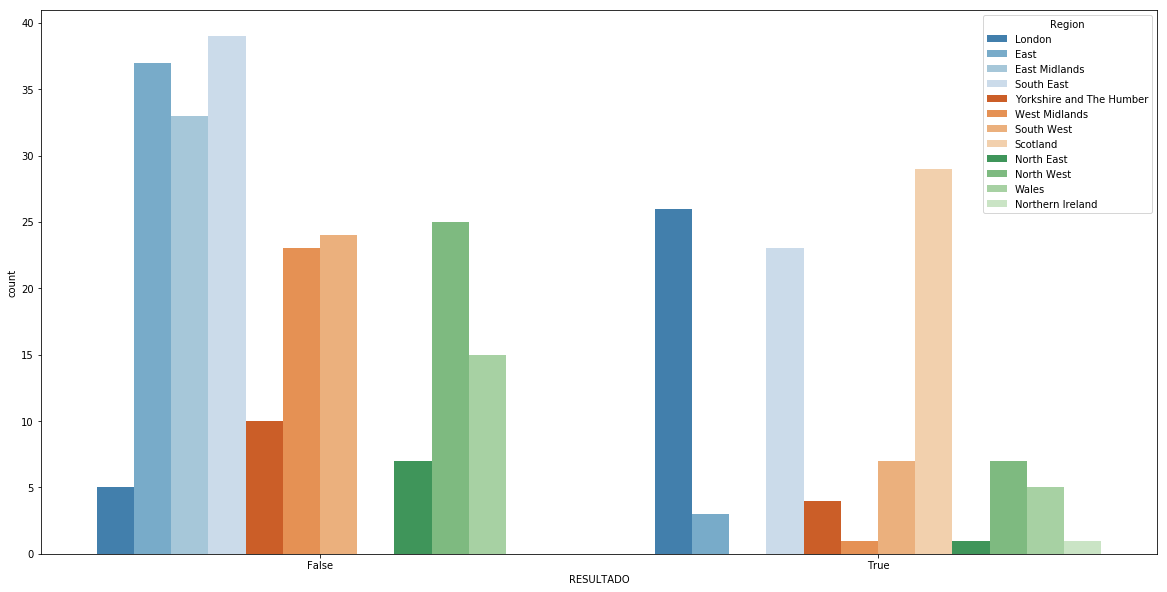

In [60]:
ax = sns.countplot(x="RESULTADO", hue="Region", data=df,palette='tab20c')

Las escalas entre ambos resultados parecen ser similares, podemos ver ejemplos como Yorkshire o South east con el mejor balance entre sus resultados y ejemplos como london y escocia mas desbalanceados.

Con balance me refiero a 50% en la variable Remain. Hagamos ahora una tabla de contingencia para estas mismas variables:

In [69]:
data_crosstab = pd.crosstab(df['Region'], df['RESULTADO'], margins = True) 
print(data_crosstab) 

RESULTADO                 False  True  All
Region                                    
East                         37     3   40
East Midlands                33     0   33
London                        5    26   31
North East                    7     1    8
North West                   25     7   32
Northern Ireland              0     1    1
Scotland                      0    29   29
South East                   39    23   62
South West                   24     7   31
Wales                        15     5   20
West Midlands                23     1   24
Yorkshire and The Humber     10     4   14
All                         218   107  325


A partir de las gráficas anteriores y las tabla de contingencia me parece pertinente mencionar que la región a la que pertenecen es un factor muy influyente para definir el `RESULTADO`.

## 2. Regresión logística

Usaremos solamente la variable región para correr nuestra regresión, preparemos nuestro dataset, es decir una columna para cada región con entradas 0 o 1 si pertenece a ella o no, por ultimo la columna `RESULTADO`, pero lo haremos con el dataset completo y despues partiremos entre entrenamiento y predicción.

In [105]:
df=pd.read_csv('BREXIT.csv')
cat='Region'
nuevo_df= pd.get_dummies(df[cat], prefix=cat)
cols=nuevo_df.columns
nuevo_df['RESULTADO']=df['Remain']>50
nuevo_df.head()

,Region_East,Region_East Midlands,Region_London,Region_North East,Region_North West,Region_Northern Ireland,Region_Scotland,Region_South East,Region_South West,Region_Wales,Region_West Midlands,Region_Yorkshire and The Humber,RESULTADO
0,1,0,0,0,0,0,0,0,0,0,0,0,False
1,1,0,0,0,0,0,0,0,0,0,0,0,False
2,1,0,0,0,0,0,0,0,0,0,0,0,False
3,1,0,0,0,0,0,0,0,0,0,0,0,False
4,1,0,0,0,0,0,0,0,0,0,0,0,False


Cómo podemos ver tenemos listo nuestro dataset, ahora separemos en `X` y `y` además obtengamos nuestra muestra para entrenamiento y para prueba, de nuevo ocupando como semilla nuestra clave única.

In [106]:
X=nuevo_df[cols]
y=nuevo_df['RESULTADO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=150344)

Una vez separado procedamos a correr nuestra regresión logística.

In [107]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Que para las variables categóricas:

In [112]:
cols

Index(['Region_East', 'Region_East Midlands', 'Region_London',
       'Region_North East', 'Region_North West', 'Region_Northern Ireland',
       'Region_Scotland', 'Region_South East', 'Region_South West',
       'Region_Wales', 'Region_West Midlands',
       'Region_Yorkshire and The Humber'],
      dtype='object')

La regresión logística ajustó las siguientes $\beta$'s

In [117]:
logreg.coef_

array([[-0.95286173, -1.35902038,  2.11360128, -1.00037108, -0.69336543,
         0.58824402,  3.07645692,  0.37751931,  0.04427841, -0.48252869,
        -1.65658678, -1.00045654]])

## 3. Hora de predecir:

In [118]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


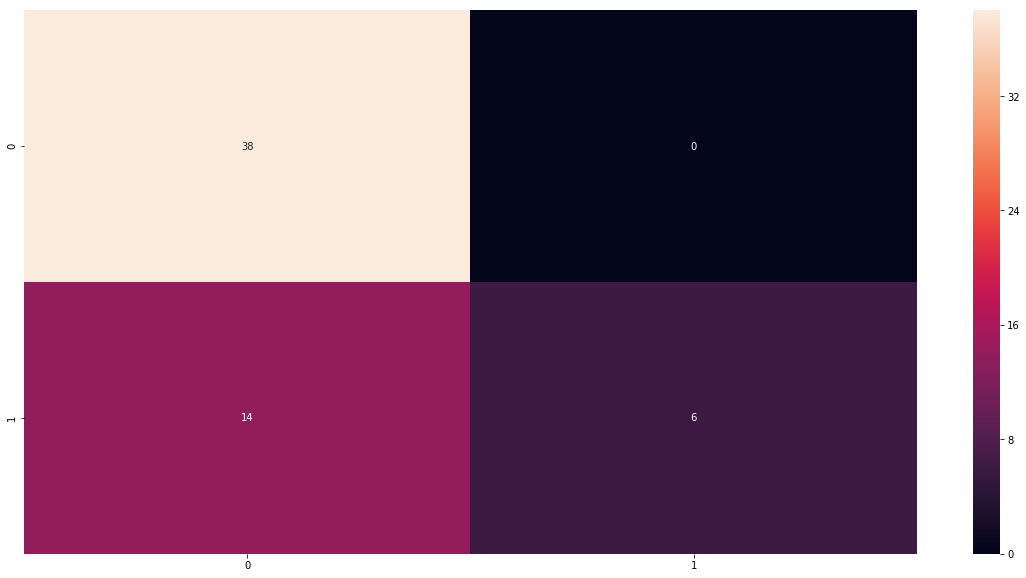

In [134]:
confusion_matrix = confusion_matrix(y_test, y_pred)
ax=sns.heatmap(confusion_matrix,annot=True)

Cómo podemos ver nuestra predicción tuvo una Accuracy de 76%, puede ser bastante buena, nuestra posterior matriz de confusión muestra 38 aciertos para `RESULTADO` falso y 6 aciertos para verdadero y 14 errores donde el modelo clasifico a 14 areas como falso cuando en realidad votaron verdadero.

## 4. Escribir ensayo.

#### Introducción:

    Los modelos matemáticos deben ser ajustados en escenarios en los que tengan sentido.
 
Es fácil ver por las gráficas en la pregunta 1. que la región era un factor determinante a la hora de predecir el resultado del **BREXIT** hipótesis que fue soportada posteriormente por el resultado arrojado por la regresión logística. Involucrar por ejemplo más información a la regresión como el `area` talvez habría sido informativo, es decir hubiera aumentado la *accuracy* del modelo, sin embargo eso hubiera sido útil para un análisis más profundo, fuera del scope del examen. Otro ejemplo de variables posiblemente informativas hubiera sido tomar en cuenta como variables categóricas como la participación o la cantidad de votos nulos establecido como una variable categórica con valor 1 o 0 dependiendo de algún valor de corte que se eligiera, como pudiera ser la media o algún otro valor representativo.

Claramente los resultados arrojados por la regresión pueden ser informativos para la hora del diseño de políticas públicas o de campañas publicitarias a favor o en contra del **Brexit**. Para esto podríamos ver las categorías de la variable `Región` que fueron más significativas en promover el `Remain`. Claro esta pensando en que tenemos información correcta y total sobre el número de regiones que existen en el **Reino Unido**.

#### El modelo logístico:

El modelo logístico te permite definir probabilidades de pertenecer o no a una clase basado en variables categóricas. Perfecto para el fenómeno que estamos tratando, claro así conociendo sus debilidades y sus deficiencias.

#### Conclusión:

Utilizar este tipo de estudios favorece el entendimiento que como humanos podemos llegar a tener sobre fenómenos sociales que nos trascienden. Es muy complicado interpretar enormes cantidades de información que podrían tener relación con fenomenos de interes, nos es hasta que:

* Hacemos un análisis exploratorio
* Ajustamos un modelo
* Concluímos

Que seremos capaces, si tenemos suerte, de abstraer la información en los miles de registros para poder obtener información comprimida, significativa e interesante que nos permita traer un poco de luz estos fenomenos híper complejos.